In [13]:
%%bash
grep "^#" ../full_dataset.vcf > ../full_dataset_sorted.vcf
grep -v "^#" ../full_dataset.vcf | sort -k1,1V -k2,2g >> ../full_dataset_sorted.vcf

In [14]:
%%bash
source ~/.bashrc
conda activate bcftools_call
bgzip ../full_dataset_sorted.vcf
tabix ../full_dataset_sorted.vcf.gz

In [34]:
%%bash
source ~/.bashrc
conda activate bcftools_call
bcftools view --samples-file ../mariah_samples.txt ../full_dataset_sorted.vcf.gz \
    -O v > ../subset_dataset.vcf

In [1]:
!cat ../mariah_samples.txt

BKT_GA_2_1
BKT_GA_2_2
BKT_domestic_hatch_1
BKT_domestic_hatch_2
BKT_horn_hatch_1
BKT_horn_hatch_2
BKT_littletupper_hatch_1
BKT_littletupper_hatch_2
BKT_assinica_hatch_1
BKT_assinica_hatch_2
BKT_temiscamie_hatch_1
BKT_windfall_hatch_1
BKT_windfall_hatch_2



In [35]:
%%bash
cd ..
python vcf2phylip.py -i subset_dataset.vcf


Converting file 'subset_dataset.vcf':

Number of samples in VCF: 13
Total of genotypes processed: 24337
Genotypes excluded because they exceeded the amount of missing data allowed: 2
Genotypes that passed missing data filter but were excluded for being MNPs: 0
SNPs that passed the filters: 24335

Sample 1 of 13, 'BKT_GA_2_1', added to the nucleotide matrix(ces).
Sample 2 of 13, 'BKT_GA_2_2', added to the nucleotide matrix(ces).
Sample 3 of 13, 'BKT_domestic_hatch_1', added to the nucleotide matrix(ces).
Sample 4 of 13, 'BKT_domestic_hatch_2', added to the nucleotide matrix(ces).
Sample 5 of 13, 'BKT_horn_hatch_1', added to the nucleotide matrix(ces).
Sample 6 of 13, 'BKT_horn_hatch_2', added to the nucleotide matrix(ces).
Sample 7 of 13, 'BKT_littletupper_hatch_1', added to the nucleotide matrix(ces).
Sample 8 of 13, 'BKT_littletupper_hatch_2', added to the nucleotide matrix(ces).
Sample 9 of 13, 'BKT_assinica_hatch_1', added to the nucleotide matrix(ces).
Sample 10 of 13, 'BKT_assini

In [2]:
%%bash
source ~/.bashrc
conda activate deep_phylogeny
raxml-ng --help


RAxML-NG v. 1.1 released on 29.11.2021 by The Exelixis Lab.
Developed by: Alexey M. Kozlov and Alexandros Stamatakis.
Contributors: Diego Darriba, Tomas Flouri, Benoit Morel, Sarah Lutteropp, Ben Bettisworth.
Latest version: https://github.com/amkozlov/raxml-ng
Questions/problems/suggestions? Please visit: https://groups.google.com/forum/#!forum/raxml

System: Intel(R) Xeon(R) CPU E5-2650 v4 @ 2.20GHz, 24 cores, 125 GB RAM

Usage: raxml-ng [OPTIONS]

Commands (mutually exclusive):
  --help                                     display help information
  --version                                  display version information
  --evaluate                                 evaluate the likelihood of a tree (with model+brlen optimization)
  --search                                   ML tree search (default: 10 parsimony + 10 random starting trees)
  --bootstrap                                bootstrapping (default: use bootstopping to auto-detect #replicates)
  --all                           

In [38]:
%%bash
source ~/.bashrc
conda activate deep_phylogeny
cd ..
raxml-ng --all --msa subset_dataset.min4.phy --model GTR \
    --bs-trees autoMRE --threads 8 --outgroup BKT_GA_2_1,BKT_GA_2_2


RAxML-NG v. 1.1 released on 29.11.2021 by The Exelixis Lab.
Developed by: Alexey M. Kozlov and Alexandros Stamatakis.
Contributors: Diego Darriba, Tomas Flouri, Benoit Morel, Sarah Lutteropp, Ben Bettisworth.
Latest version: https://github.com/amkozlov/raxml-ng
Questions/problems/suggestions? Please visit: https://groups.google.com/forum/#!forum/raxml

System: Intel(R) Xeon(R) CPU E5-2650 v4 @ 2.20GHz, 24 cores, 125 GB RAM

RAxML-NG was called at 09-Dec-2023 21:06:10 as follows:

raxml-ng --all --msa subset_dataset.min4.phy --model GTR --bs-trees autoMRE --threads 8 --outgroup BKT_GA_2_1,BKT_GA_2_2

Analysis options:
  run mode: ML tree search + bootstrapping (Felsenstein Bootstrap)
  start tree(s): random (10) + parsimony (10)
  bootstrap replicates: max: 1000 + bootstopping (autoMRE, cutoff: 0.030000)
  outgroup taxa: BKT_GA_2_1,BKT_GA_2_2
  random seed: 1702173970
  tip-inner: OFF
  pattern compression: ON
  per-rate scalers: OFF
  site repeats: ON
  branch lengths: proportional (M

[00:00:40] [worker #3] Bootstrap tree #68, logLikelihood: -57794.007781
[00:00:41] [worker #1] Bootstrap tree #74, logLikelihood: -58219.415589
[00:00:41] [worker #2] Bootstrap tree #67, logLikelihood: -58279.821793
[00:00:41] [worker #7] Bootstrap tree #72, logLikelihood: -58052.798839
[00:00:41] [worker #4] Bootstrap tree #69, logLikelihood: -57731.064049
[00:00:41] [worker #6] Bootstrap tree #71, logLikelihood: -58922.680377
[00:00:41] [worker #5] Bootstrap tree #70, logLikelihood: -58330.645172
[00:00:42] [worker #0] Bootstrap tree #73, logLikelihood: -58624.056388
[00:00:42] [worker #3] Bootstrap tree #76, logLikelihood: -57681.270981
[00:00:43] [worker #1] Bootstrap tree #82, logLikelihood: -58610.843769
[00:00:43] [worker #7] Bootstrap tree #80, logLikelihood: -57535.963519
[00:00:43] [worker #6] Bootstrap tree #79, logLikelihood: -58189.045356
[00:00:43] [worker #2] Bootstrap tree #75, logLikelihood: -58613.932422
[00:00:43] [worker #4] Bootstrap tree #77, logLikelihood: -58117

In [39]:
!cat /storage/group/ibb3/default/acro_popgen_variants/trout_mitoassembly/subset_dataset.min4.phy.raxml.support

(((BKT_temiscamie_hatch_1:0.001408,(BKT_domestic_hatch_2:0.005214,BKT_domestic_hatch_1:0.004357)100:0.006867)100:0.004100,(((BKT_horn_hatch_2:0.001236,BKT_horn_hatch_1:0.001263)100:0.018760,((BKT_littletupper_hatch_2:0.008880,BKT_littletupper_hatch_1:0.005647)92:0.003388,(BKT_windfall_hatch_2:0.005738,BKT_windfall_hatch_1:0.005527)99:0.003752)93:0.003409)85:0.003519,(BKT_assinica_hatch_1:0.006931,BKT_assinica_hatch_2:0.005951)99:0.004608)63:0.002175)100:0.044295,(BKT_GA_2_2:0.002605,BKT_GA_2_1:0.002938):0.044295);


In [10]:
!cat ../r8s_input.txt

#NEXUS
begin trees;
tree nj_tree = [&R] (((BKT_temiscamie_hatch_1:0.001408,(BKT_domestic_hatch_2:0.005214,BKT_domestic_hatch_1:0.004357)100:0.006867)100:0.004100,(((BKT_horn_hatch_2:0.001236,BKT_horn_hatch_1:0.001263)100:0.018760,((BKT_littletupper_hatch_2:0.008880,BKT_littletupper_hatch_1:0.005647)92:0.003388,(BKT_windfall_hatch_2:0.005738,BKT_windfall_hatch_1:0.005527)99:0.003752)93:0.003409)85:0.003519,(BKT_assinica_hatch_1:0.006931,BKT_assinica_hatch_2:0.005951)99:0.004608)63:0.002175)100:0.044295,(BKT_GA_2_2:0.002605,BKT_GA_2_1:0.002938):0.044295);
End;
begin rates;
blformat nsites=24335 lengths=persite ultrametric=no;
collapse;
mrca northsouth BKT_GA_2_1 BKT_littletupper_hatch_2;
fixage taxon=northsouth age=1.8;
divtime method=pl algorithm=tn cvStart=0 cvInc=0.5 cvNum=8 crossv=yes;
describe plot=chronogram;
describe plot=tree_description;
end;


In [ ]:
%%bash
source ~/.bashrc
conda activate orthofinder
cd /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/r8s1.81/src/
./r8s \
    -b -f /storage/group/ibb3/default/acro_popgen_variants/trout_mitoassembly/r8s_input.txt \
    > /storage/group/ibb3/default/acro_popgen_variants/trout_mitoassembly/r8s_calibrated.txt

In [81]:
%%bash
tail -n 1 ../r8s_calibrated.txt | cut -c 16- > ../r8s_calibrated_ultrametric.txt

In [82]:
!cat ../r8s_calibrated_ultrametric.txt

((((BKT_domestic_hatch_2:0.115447,BKT_domestic_hatch_1:0.115447)100:0.140389,BKT_temiscamie_hatch_1:0.255835)100:0.202525,(((BKT_horn_hatch_2:0.027714,BKT_horn_hatch_1:0.027714)100:0.332996,((BKT_littletupper_hatch_2:0.193877,BKT_littletupper_hatch_1:0.193877)92:0.082657,(BKT_windfall_hatch_2:0.165922,BKT_windfall_hatch_1:0.165922)99:0.110613)93:0.084174)85:0.056219,(BKT_assinica_hatch_1:0.223199,BKT_assinica_hatch_2:0.223199)99:0.193729)63:0.041433)100:1.141640,(BKT_GA_2_2:0.088344,BKT_GA_2_1:0.088344):1.511656)northsouth;


In [2]:
import toytree
import toyplot
import numpy as np
import pandas as pd
import toyplot.pdf

Here we'll rename the tips so that we can easily query a dataframe of CTmax values. We'll rename one of the Domestic tips as a TxD tip just because we'll do some styling in Illustrator that requires the tip to be there:

In [ ]:
((((TD:0.115447,D:0.115447)100:0.140389,TE:0.255835)100:0.202525,(((HL:0.027714,BKT_horn_hatch_1:0.027714)100:0.332996,((LT:0.193877,BKT_littletupper_hatch_1:0.193877)92:0.082657,(WF:0.165922,BKT_windfall_hatch_1:0.165922)99:0.110613)93:0.084174)85:0.056219,(BKT_assinica_hatch_1:0.223199,AS:0.223199)99:0.193729)63:0.041433)100:1.141640,(BKT_GA_2_2:0.088344,BKT_GA_2_1:0.088344):1.511656)northsouth;

In [84]:
newick = "((((TD:0.115447,D:0.115447)100:0.140389,TE:0.255835)100:0.202525,(((HL:0.027714,BKT_horn_hatch_1:0.027714)100:0.332996,((LT:0.193877,BKT_littletupper_hatch_1:0.193877)92:0.082657,(WF:0.165922,BKT_windfall_hatch_1:0.165922)99:0.110613)93:0.084174)85:0.056219,(BKT_assinica_hatch_1:0.223199,AS:0.223199)99:0.193729)63:0.041433)100:1.141640,(BKT_GA_2_2:0.088344,BKT_GA_2_1:0.088344):1.511656);"
tre0 = toytree.tree(newick, tree_format=0)
canvas = toyplot.Canvas(width=900, height=400)
axes = canvas.cartesian()
axes.show = True
support = rtre.get_node_values("support", show_root=True, show_tips=False)
#tre0 = tre0.rotate_node(names = ["gfas", "amil"])
rtre = tre0.drop_tips("BKT_GA_2_1")
rtre = rtre.drop_tips("BKT_assinica_hatch_1")
rtre = rtre.drop_tips("BKT_horn_hatch_1")
rtre = rtre.drop_tips("BKT_littletupper_hatch_1")
rtre = rtre.drop_tips("BKT_windfall_hatch_1")
#rtre0 = tre0.rotate_node(wildcard = "gfas")
rtre.draw(tip_labels=['Windfall Lake, NY, USA (Hatchery Strain)',
 'Little Tupper Lake, NY, USA (Hatchery Strain)',
 'Horn Lake, NY, USA (Hatchery Strain)',
 'Assinica Lake, QC, CA (Hatchery Strain)',
 '\'Domestic\', NY, USA (Hatchery Strain)',
 'Temiscamie X \'Domestic\' F1',
 'Temiscamie River, QC, CA (Hatchery Strain)',
 'Georgia, USA (Wild)'], tree_style = "n", 
           axes = axes, tip_labels_align=True, scalebar = True, node_labels=support)
#toyplot.pdf.render(canvas, "../figures/tree-plot.pdf")

(None,
 <toytree.Render.ToytreeMark at 0x14aff7fa6490>)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="900.0px" height="400.0px" viewBox="0 0 900.0 400.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t2c07a1a6855748788f95f47797d1841e"> 93 85 100 63 100 100 0 Windfall Lake, NY, USA (Hatchery Strain) Little Tupper Lake, NY, USA (Hatchery Strain) Horn Lake, NY, USA (Hatchery Strain) Assinica Lake, QC, CA (Hatchery Strain) 'Domestic', NY, USA (Hatchery Strain) Temiscamie X 'Domestic' F1 Temiscamie River, QC, CA (Hatchery Strain) Georgia, USA (Wild) 0.0 0.5 1.1 1.6

In [85]:
ctmax = pd.read_csv("../ctmax_data.csv")

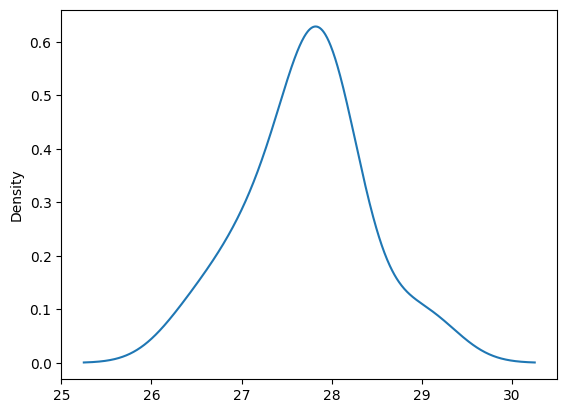

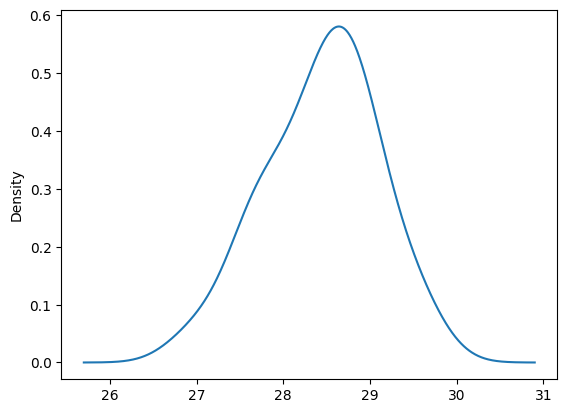

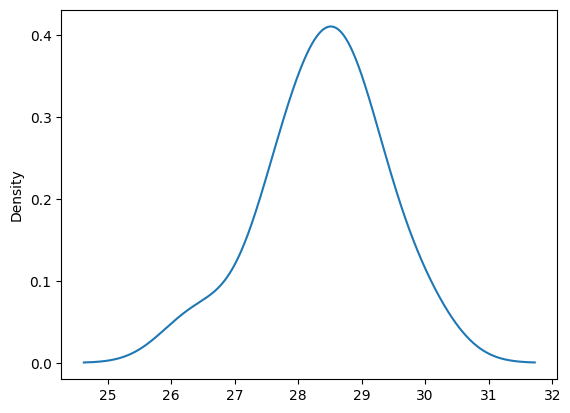

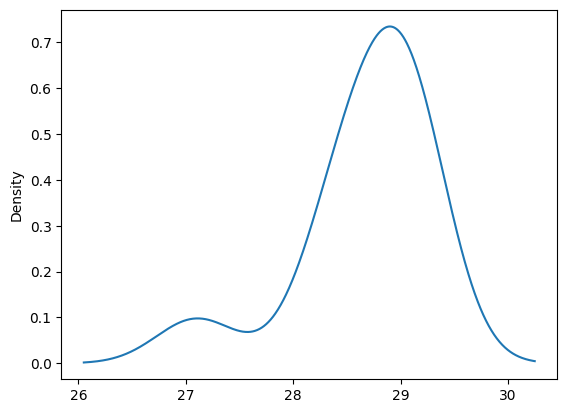

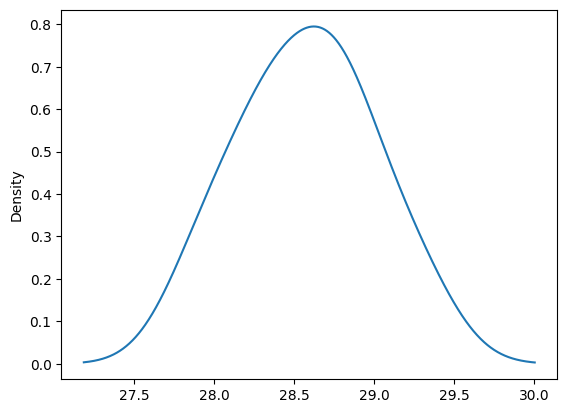

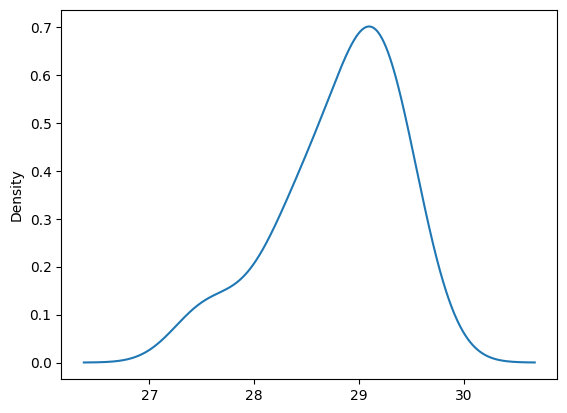

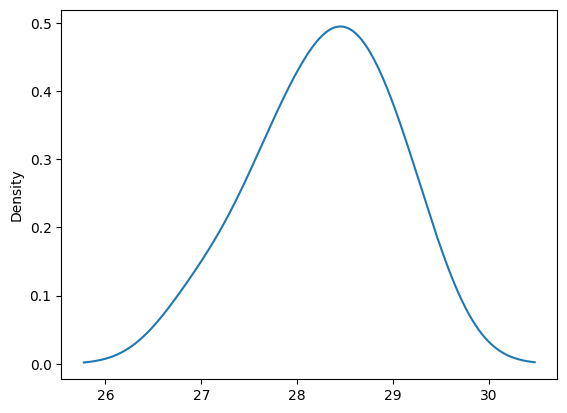

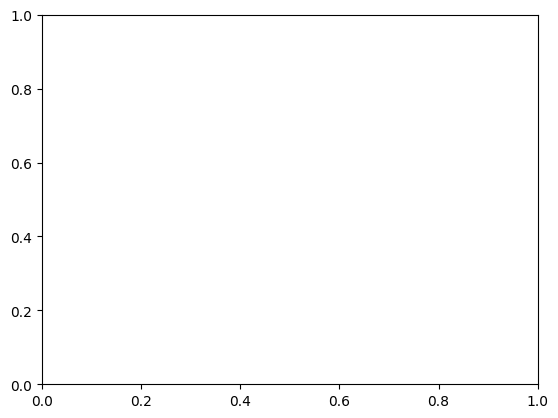

In [86]:
import itertools
import matplotlib.pyplot as plt
hists = pd.DataFrame()
for i in rtre.get_tip_labels():
    try:
        plt.figure()
        d = ctmax["CTmax"][ctmax["Strain"] == i].plot.kde()
        l = d.get_children()[0].get_path()
        l = l.vertices
        points, probs = np.split(l, 2, 1)
        points1 = np.array(list(itertools.chain(*points)))
        probs1 = np.array(list(itertools.chain(*probs)))
        tmp = pd.DataFrame(data = [points1, probs1]).T
        tmp["tip"] = i
        hists = pd.concat([hists, tmp])
    except:
        pass

In [87]:
support = rtre.get_node_values("support", show_root=True, show_tips=False)

In [88]:
support = np.array(['', '100', '100', '63', '', '85', '93', '', '', '', '', '', '',
       '', ''])

In [109]:
import scipy.stats as sc
    
# set up canvas for two panel plot
canvas = toyplot.Canvas(width=800, height=250)
ntips = 8
# add tree to canvas
ax0 = canvas.cartesian(bounds=('10%', '70%', '10%', '90%'), ymin=0, ymax=ntips, padding=15)
rtre.draw(tip_labels=['Windfall Lake, NY, USA (Hatchery Strain)',
 'Little Tupper Lake, NY, USA (Hatchery Strain)',
 'Horn Lake, NY, USA (Hatchery Strain)',
 'Assinica Lake, QC, CA (Hatchery Strain)',
 '\'Domestic\', NY, USA (Hatchery Strain)',
 'Temiscamie X \'Domestic\' F1',
 'Temiscamie River, QC, CA (Hatchery Strain)',
 'Georgia, USA (Wild)'], tree_style = "n", 
           axes = ax0, tip_labels_align=True, scalebar = True, 
          node_labels=support, node_sizes=16)
#rtre.draw(tip_labels=True, tree_style = "n", 
#           axes = ax0, tip_labels_align=True, scalebar = True)
ax0.show = False

# add histograms to canvas
ax1 = canvas.cartesian(bounds=('75%', '95%', '10%', '90%'), ymin=0, ymax=ntips, padding=15)

# iterate from top to bottom (ntips to 0)
for tip in list(range(rtre.ntips)[::-1]):
    try:
        # select a color for hist
        color = toytree.colors[int((tip) / 10)]

        # get tip name and get hist from dict
        tipname = rtre.get_tip_labels()[tip]
        tipdata = hists[hists["tip"] == tipname].reset_index(drop=True)
        points = np.array(tipdata[0])
        probs = np.array(tipdata[1])

        # fill histogram with slightly overlapping histograms
        ax1.fill(
            points, #x values 
            probs / probs.max() * 1.25, #y values
            baseline=[tip] * len(points),
            style={"fill": color, "stroke": "white", "stroke-width": 0.5},
            title=tipname,
        )

        # add horizontal line at base
        ax1.hlines(tip, opacity=0.5, color="grey", style={"stroke-width": 0.5})
    except:
        pass

    # hide y axis, show x
ax1.y.show = False
ax1.x.label.text = "Trait value"
ax1.x.ticks.show = True
import toyplot.pdf
toyplot.pdf.render(canvas, "../tree-plot.pdf")

In [103]:
lambdatre = rtre.drop_tips("TD")

In [104]:
lambdatre = lambdatre.drop_tips("BKT_GA_2_2")

In [105]:
lambdatre.write()

'((TE:0.255835,D:0.255836)100:0.202525,(AS:0.416928,(HL:0.36071,(LT:0.276534,WF:0.276535)93:0.084174)85:0.056219)63:0.041433);'